# House Sales Prices Analysis Using Multi-Linear Regression

## <small>1. Businness Understanding</small>

### <small>a) Introduction</small>

The goal of this project is to analyze house sales data using multiple regression modelling techniques. By employing multiple regression, we aim to identify and quantify the relationships that exists between various factors or predictors and house sale prices.This analysis will provide insights into the key drivers of house prices and help shareholders make informed decisions related to real estate investment.

### <small> b) Problem Statement</small>

This project seek to address the importannce of identifying the factors that significantly affect house prices.Traditional approaches often rely on anectodal evidence or limited analysis, resulting into inaccurate insights. This knowledge gap hampers stakeholders' ability to predict and interpret house proce flactuations effectively. To address this problem, we propose utilizing multiple regression modeling techniques to analyze house sales data comprehensively. By conducting multiple regression, we can identify the relationship between different factors and house sales prices, taking into account the collective impact of multiple independent variables.

### <small>c) Main Objective</small>

To analyze house sales data using multiple regression modeling techniques to identify and quantify the key factors influencing house sales prices and help shareholders make data driven decisions on investing in real estate.

### <small>d) Subjective Objectives</small>

1. Conduct explanatory data analysis to gain insights on the relationships between different variables and target variable, assisting in selection of relevant variables for regression model.
2. Develop multiple regression model to predict house sale prices, considering the selected independent variables and their impact on the dependent variable.Validate the model assumptions, assess its goodness of fit and refine the model if necesssay.
3. Interpret the coefficients of the independent variables in the model to determine their individual impact on house prices, identifying the most influential factors driving thr house sales prices and their respective effects.
4. Evaluate and validate the performnance of the model.
5. Provide actionable insights and recommendations based on the analysis to assist real estate investors, and policymakers in making informed decisions regarding property investment, market trends, and economic planning.

### <small> e) Notebook Structure</small>

1. Reading the data.
2. Data Cleaning and Preprocessing.
3. Multiple Regression Modelling.
4. Model Evaluation and Undesrtanding.
5. Results Presentation and Conclusions.
6. Recommendations
7. References.

### <small> f) Data Understanding</small>

The dataset used in this project contains information about the factors affecting the housing prices including variables such as date, sqft_above, view and sqft_basement. Explanatory data analysis will be used to get a clear understanding of the dataset including the missing values, checking the data types, identifying outliers and also extracting relevant features for analysis. 

## 2. Importing Inportant Packages

In [687]:
import numpy as np # for algebra
import pandas as pd # for data processing
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from matplotlib import rcParams
rcParams['figure.figsize'] = 7, 5
pd.options.display.max_columns = 25
sns.set(style='darkgrid')

#validation
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
#models 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.rom sklearn.preprocessing import StandardScaler



## 3. Reading Data

In [688]:
df = pd.read_csv('data/kc_house_data.csv')
# See the head of the dataframe
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [689]:
df['floors'].value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

## 4. Explanatory Data Analysis

In [690]:
# Check the shape of the dataset
print(f"Shape of df is : {df.shape}")

Shape of df is : (21597, 21)


In [691]:
# An overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [692]:
# Statistical distribjtion of the dataset
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## 5. Data Wrangling

### <small> a) Data Cleaning </small>

In [693]:
# Check for null values
pd.DataFrame(df.isna().sum()).T


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,0,0,0,0,0,0,0,2376,63,0,0,0,0,0,3842,0,0,0,0,0


In [694]:
df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [695]:
# Fill all the null values with 'Unknown' since the column contains categorical data
df['waterfront'].fillna('NO',inplace=True)
# Check for missing values now
pd.DataFrame(df.isna().sum()).T

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,0,0,0,0,0,0,0,0,63,0,0,0,0,0,3842,0,0,0,0,0


In [696]:
df['waterfront'].unique()

array(['NO', 'YES'], dtype=object)

In [697]:
# Deal with missing values in the view column
# Check for the counts of different categories
df['view'].value_counts()


NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [698]:
#  Replace the missing values with the most frequent category
df['view'].fillna('NONE',inplace=True)

In [699]:
# check forthe count unique values in the year renoveted column 
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [700]:
# Replace null with the most frequent value
df['yr_renovated'].fillna(0,inplace=True)

In [701]:
# Check for null values
pd.DataFrame(df.isna().sum()).T

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


No missing values!

In [702]:
#iterate through the columns to see the frequency of different values
for i in df.columns:
    print(df[i].value_counts())

795000620     3
8910500150    2
7409700215    2
1995200200    2
9211500620    2
             ..
3649100387    1
2767603649    1
1446403617    1
5602000275    1
1523300157    1
Name: id, Length: 21420, dtype: int64
6/23/2014    142
6/25/2014    131
6/26/2014    131
7/8/2014     127
4/27/2015    126
            ... 
11/2/2014      1
1/31/2015      1
5/24/2015      1
5/17/2014      1
7/27/2014      1
Name: date, Length: 372, dtype: int64
450000.0    172
350000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
278800.0      1
439888.0      1
354901.0      1
942000.0      1
402101.0      1
Name: price, Length: 3622, dtype: int64
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.

### b) Encoding Categorical Columns in the Data

In [703]:
# Define the order of the categories
category_order = {
    'NO': 0,
    "YES" : 1
}

# Perform ordinal encoding on the "waterfront" column
df["waterfront_encoded"] = df["waterfront"].map(category_order)

# Replace the original "waterfront" column with the encoded values
df["waterfront"] = df["waterfront_encoded"]

# Check the updated dataset
df['waterfront'].value_counts()



0    21451
1      146
Name: waterfront, dtype: int64

In [704]:
# Let's check the count of the encoded column of waterfront
df['waterfront'].value_counts()

0    21451
1      146
Name: waterfront, dtype: int64

In [705]:
# Encode the column view
# Define the order of the categories
category_order = {
    "NONE": 0,
    "AVERAGE": 1,
    "GOOD": 2,
    "FAIR": 3,
    "EXCELLENT": 4
}

# Perform ordinal encoding on the "view" column
df["view_encoded"] = df["view"].map(category_order)

# Replace the original "view" column with the encoded values
df["view"] = df["view_encoded"]

# Check the updated dataset
df['view'].value_counts()


0    19485
1      957
2      508
3      330
4      317
Name: view, dtype: int64

In [706]:
# Let's encode the condition column 
# Define the order of the categories
category_order = {
    "Poor": 1,
    "Fair": 2,
    "Average": 3,
    "Good": 4,
    "Very Good": 5
}

# Perform ordinal encoding on the "condition" column
df["condition_encoded"] = df["condition"].map(category_order)

# Replace the original "condition" column with the encoded values
df["condition"] = df["condition_encoded"]

# Check the updated dataset
df['condition'].value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [707]:
# Encode the grade column
# Define the order of the categories
category_order = {
    "3 Poor": 3,
    "5 Fair": 5,
    "4 Low": 4,
    "6 Low Average": 6,
    "7 Average": 7,
    "8 Good": 8,
    "9 Better": 9,
    "10 Very Good": 10,
    "11 Excellent": 11,
    "12 Luxury": 12,
    "13 Mansion": 13
}

# Perform ordinal encoding on the "grade" column
df["grade_encoded"] = df["grade"].replace(category_order)

# Replace the original "grade" column with the encoded values
df["grade"] = df["grade_encoded"]

# Check the updated dataset
df['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [708]:
# View the encoded dataset
df_encoded = df
df_encoded

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,waterfront_encoded,view_encoded,condition_encoded,grade_encoded
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0,0,3,7
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,0,0,3,7
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0,0,3,6
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0,0,5,7
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0,0,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,0,0,3,8
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,0,0,3,8
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,0,0,3,7
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,0,0,3,8


In [709]:
# Convert "yr_renovated" column to integer
df_encoded["yr_renovated"] = df_encoded["yr_renovated"].astype(int)

In [710]:
# Drop the encoded columns
df_updated= df_encoded.drop(["waterfront_encoded", "view_encoded", "condition_encoded", "grade_encoded"], axis=1)

# Check the updated dataset
df_updated

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0.0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400.0,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0.0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910.0,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0.0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0.0,2009,0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0.0,2014,0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0.0,2009,0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0.0,2004,0,98027,47.5345,-122.069,1410,1287


In [711]:
# Check the correlation between the independent factors and the target variable house prices
pd.DataFrame(df_updated.corr()['price']).sort_values(by='price',ascending=False)

,price
price,1.000000
sqft_living,0.701917
grade,0.667951
sqft_above,0.605368
sqft_living15,0.585241
bathrooms,0.525906
view,0.386430
bedrooms,0.308787
lat,0.306692
waterfront,0.264306


From the results above sqft_living has the highest positive correlation coefficient (0.701917), indicating a relatively strong positive linear relationship with the price of a property. As the square footage of the living area increases, the price tends to increase as well.
sqft_above also has a positive correlation coefficient of 0.605368, indicating a moderately strong positive linear relationship with the price. It represents the square footage of the interior living space above ground level.
sqft_lot has a weak positive correlation coefficient of 0.089876. It represents the square footage of the land area of the property.
id: This feature has a weak negative correlation coefficient of -0.016772. It represents the identifier of the property, which is not meaningful in terms of correlation with price.
zipcode has a weak negative correlation coefficient of -0.053402. It represents the zipcode of the property, which also does not show a strong correlation with price.

Keep in mind that correlation does not imply causation. These correlation coefficients only indicate the linear relationship between the features and the price in the dataset, and there may be other factors not captured in the dataset that affect the price of a property

### c) Formating Date Types

In [712]:
# Drop rows with invalid dates
df_updated = df_updated.dropna(subset=['date'])

# Convert the date column to datetime
df_updated['date'] = pd.to_datetime(df_updated['date'])

# Calculate years since built
df_updated['years_since_built'] = df_updated['date'].dt.year - df_updated['yr_built']

# Calculate years to renovation
df_updated['years_since_renovation'] =np.abs(df_updated['yr_renovated']- df_updated['yr_built']) 
df_updated['years_since_renovation'] = df_updated.years_since_renovation.apply(lambda x: x if len(str(int(x)))==2 else 0.0)

# Check the updated dataset
df_updated

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,years_since_built,years_since_renovation
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0.0,1955,0,98178,47.5112,-122.257,1340,5650,59,0.0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400.0,1951,1991,98125,47.7210,-122.319,1690,7639,63,40.0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0.0,1933,0,98028,47.7379,-122.233,2720,8062,82,0.0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910.0,1965,0,98136,47.5208,-122.393,1360,5000,49,0.0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0.0,1987,0,98074,47.6168,-122.045,1800,7503,28,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0.0,2009,0,98103,47.6993,-122.346,1530,1509,5,0.0
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0.0,2014,0,98146,47.5107,-122.362,1830,7200,1,0.0
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0.0,2009,0,98144,47.5944,-122.299,1020,2007,5,0.0
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0.0,2004,0,98027,47.5345,-122.069,1410,1287,11,0.0


In [713]:
# Replace values greater than 50 in years_since_renovation with years_since_built
df_updated.loc[df_updated['years_since_renovation'] > 100, 'years_since_renovation'] = df_updated['years_since_built']

# Check the updated dataset
df_updated
# This will take into account the huge numbers that comes as a result of having a 0 as our time of renovation, so we will take the time since building as our time since renovation

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,years_since_built,years_since_renovation
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0.0,1955,0,98178,47.5112,-122.257,1340,5650,59,0.0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400.0,1951,1991,98125,47.7210,-122.319,1690,7639,63,40.0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0.0,1933,0,98028,47.7379,-122.233,2720,8062,82,0.0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910.0,1965,0,98136,47.5208,-122.393,1360,5000,49,0.0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0.0,1987,0,98074,47.6168,-122.045,1800,7503,28,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0.0,2009,0,98103,47.6993,-122.346,1530,1509,5,0.0
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0.0,2014,0,98146,47.5107,-122.362,1830,7200,1,0.0
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0.0,2009,0,98144,47.5944,-122.299,1020,2007,5,0.0
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0.0,2004,0,98027,47.5345,-122.069,1410,1287,11,0.0


### d) Dropping Irrelevant Columns

In [714]:
df_updated.drop(['id','date','yr_built','yr_renovated'], axis=1,inplace=True)
df_updated.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,years_since_built,years_since_renovation
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0.0,98178,47.5112,-122.257,1340,5650,59,0.0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400.0,98125,47.7210,-122.319,1690,7639,63,40.0
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0.0,98028,47.7379,-122.233,2720,8062,82,0.0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910.0,98136,47.5208,-122.393,1360,5000,49,0.0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0.0,98074,47.6168,-122.045,1800,7503,28,0.0


### e) Relationship between Predictor Variables

In [715]:
# Let's check the independent variables with high collinaerity
corr_feat = []
for j , k in df_updated.corr().iterrows():
    i=0
    for r in range(len(k)):
        if j!= k.index[i]:
            if k.values[i] >=0.5:
                corr_feat.append([j, k.index[i], k.values[i]])
        i += 1
corr_feat

[['price', 'bathrooms', 0.525905621453199],
 ['price', 'sqft_living', 0.7019173021377559],
 ['price', 'grade', 0.667950771387642],
 ['price', 'sqft_above', 0.6053679437051771],
 ['price', 'sqft_living15', 0.5852412017040634],
 ['bedrooms', 'bathrooms', 0.5145078282793009],
 ['bedrooms', 'sqft_living', 0.5782122492778425],
 ['bathrooms', 'price', 0.525905621453199],
 ['bathrooms', 'bedrooms', 0.5145078282793009],
 ['bathrooms', 'sqft_living', 0.7557576009502519],
 ['bathrooms', 'floors', 0.5025819656565149],
 ['bathrooms', 'grade', 0.6658378437948658],
 ['bathrooms', 'sqft_above', 0.686667793202443],
 ['bathrooms', 'sqft_living15', 0.569883861596945],
 ['sqft_living', 'price', 0.7019173021377559],
 ['sqft_living', 'bedrooms', 0.5782122492778425],
 ['sqft_living', 'bathrooms', 0.7557576009502519],
 ['sqft_living', 'grade', 0.7627790466721378],
 ['sqft_living', 'sqft_above', 0.8764477590354977],
 ['sqft_living', 'sqft_living15', 0.7564015282475041],
 ['sqft_lot', 'sqft_lot15', 0.718204030

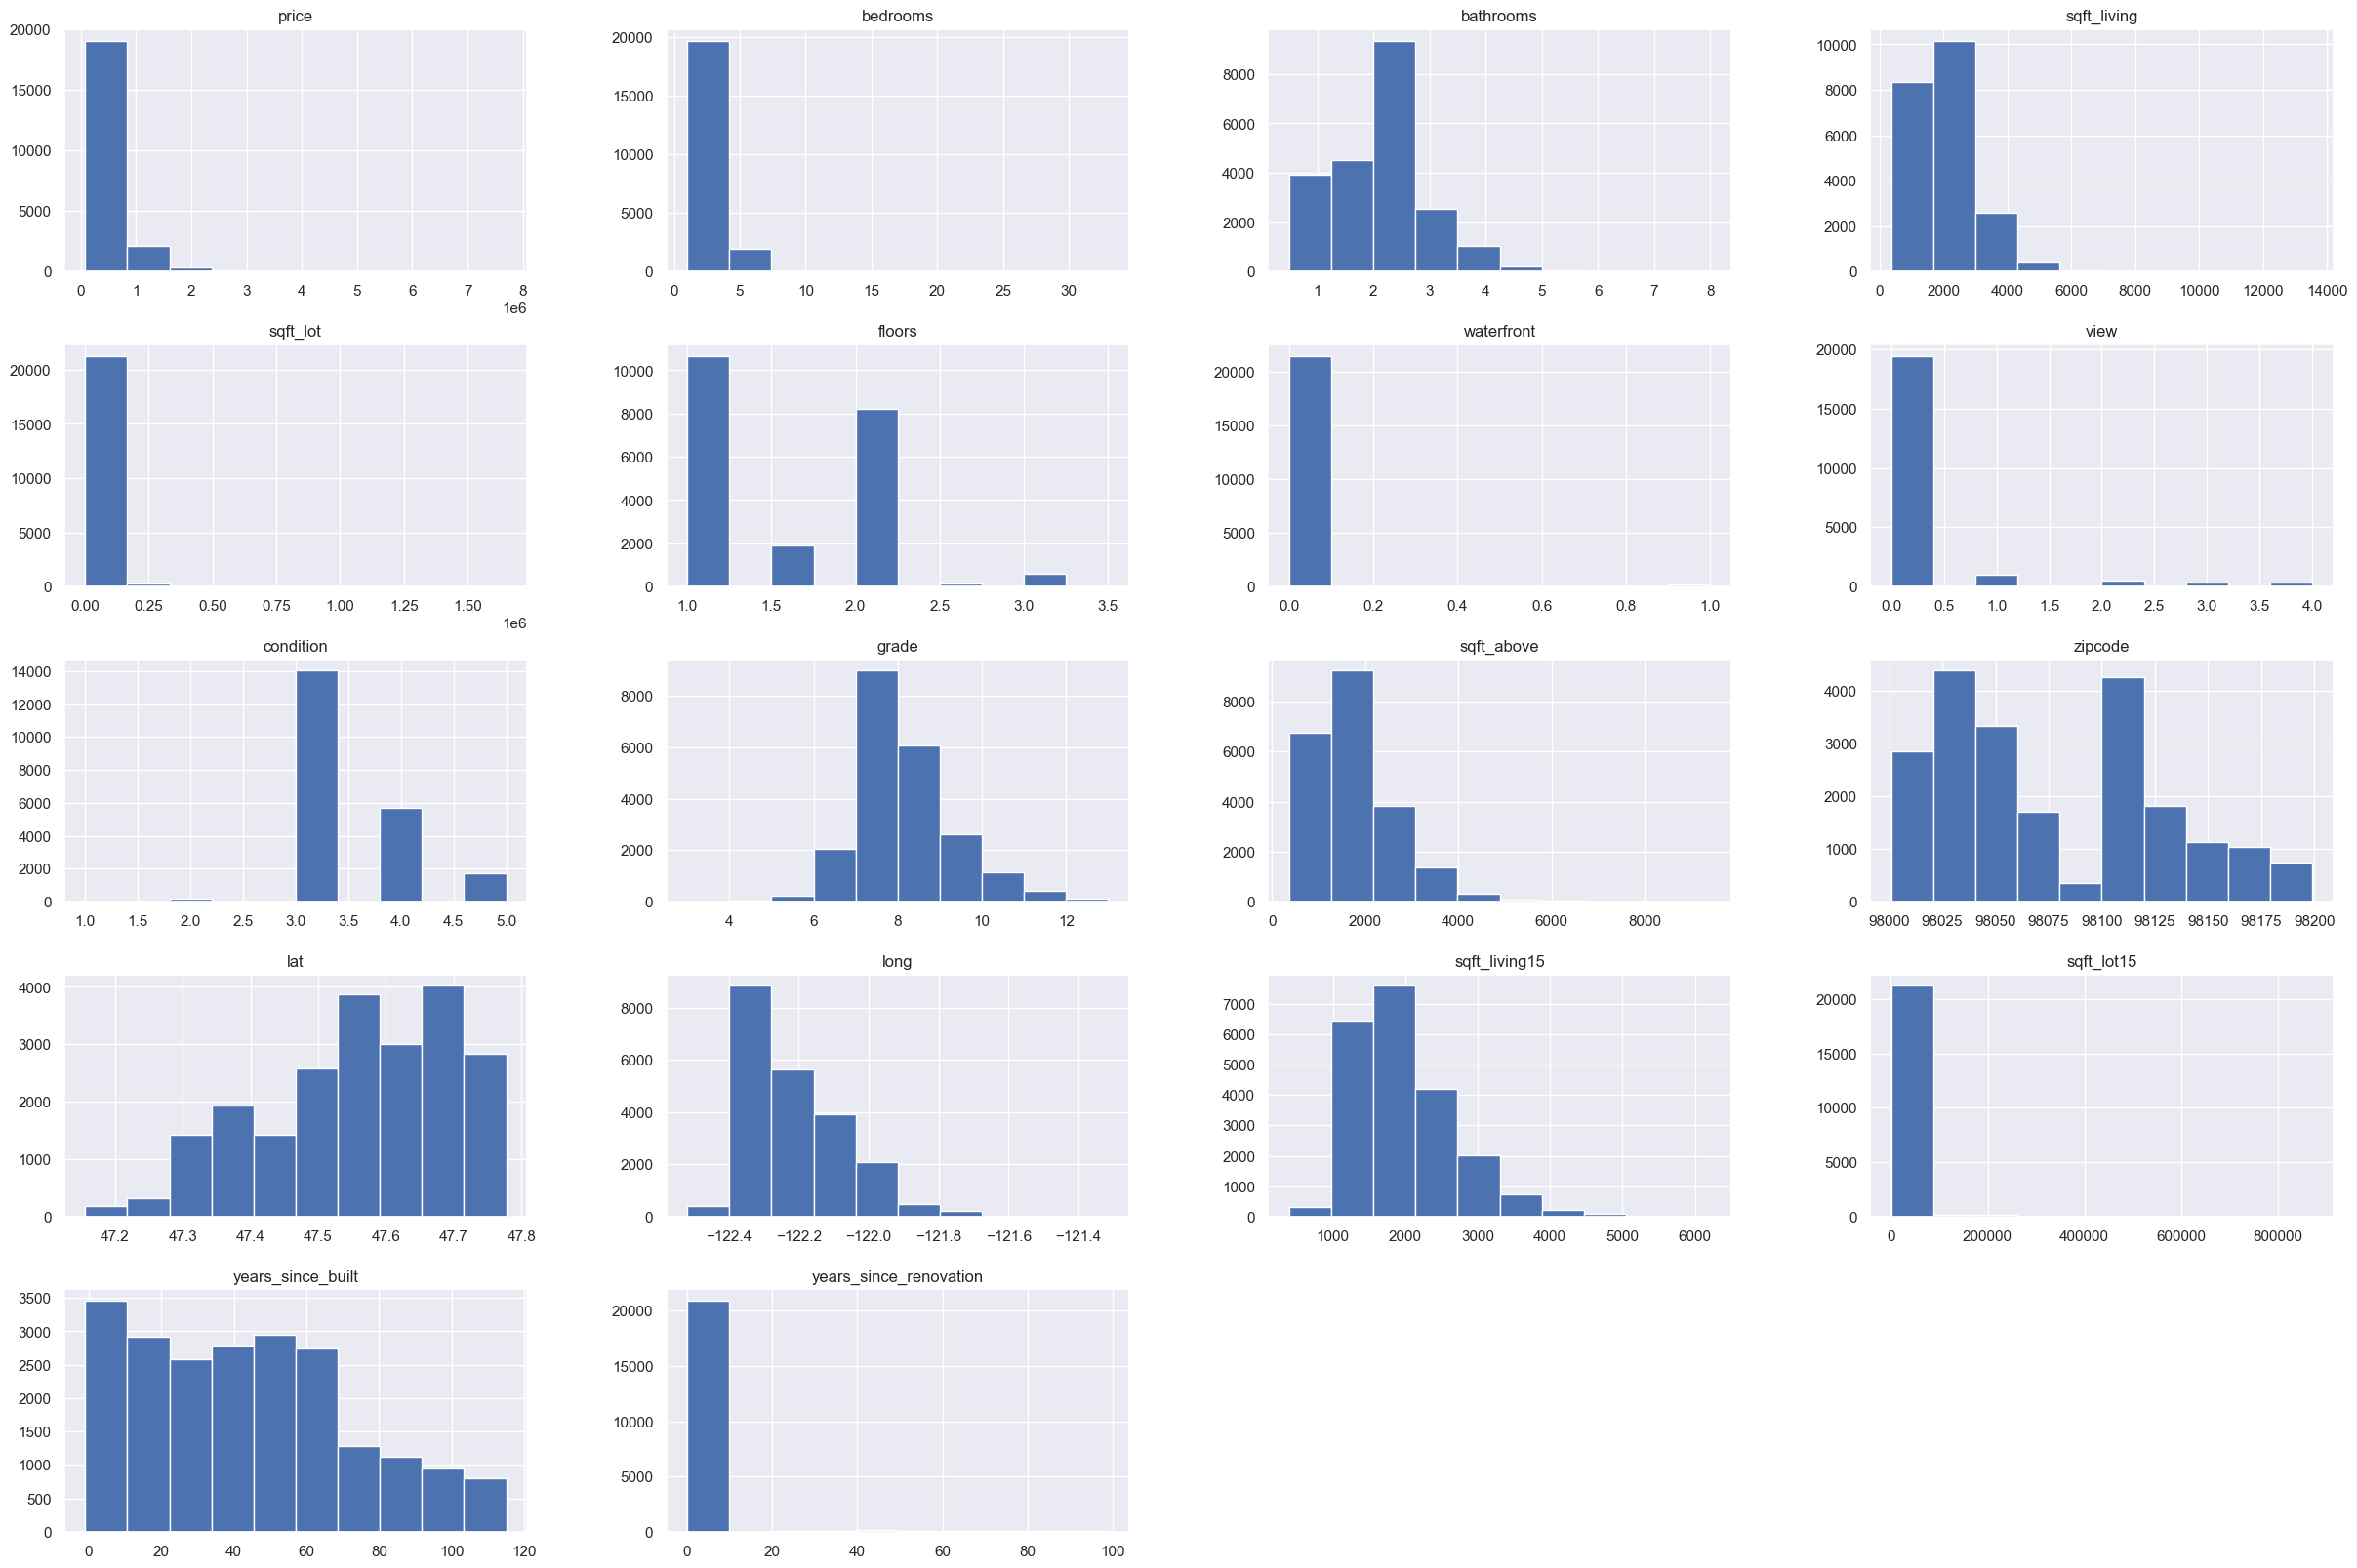

In [716]:
# plot the frequency for the data columns
df_updated.hist(figsize=(30,20))
plt.show()

Now let's adresss multicollinearity where we have two predictor variables that are highly correlated.  This will improve interpretability of our results, reduce redundancy and even enhsnce model stability.

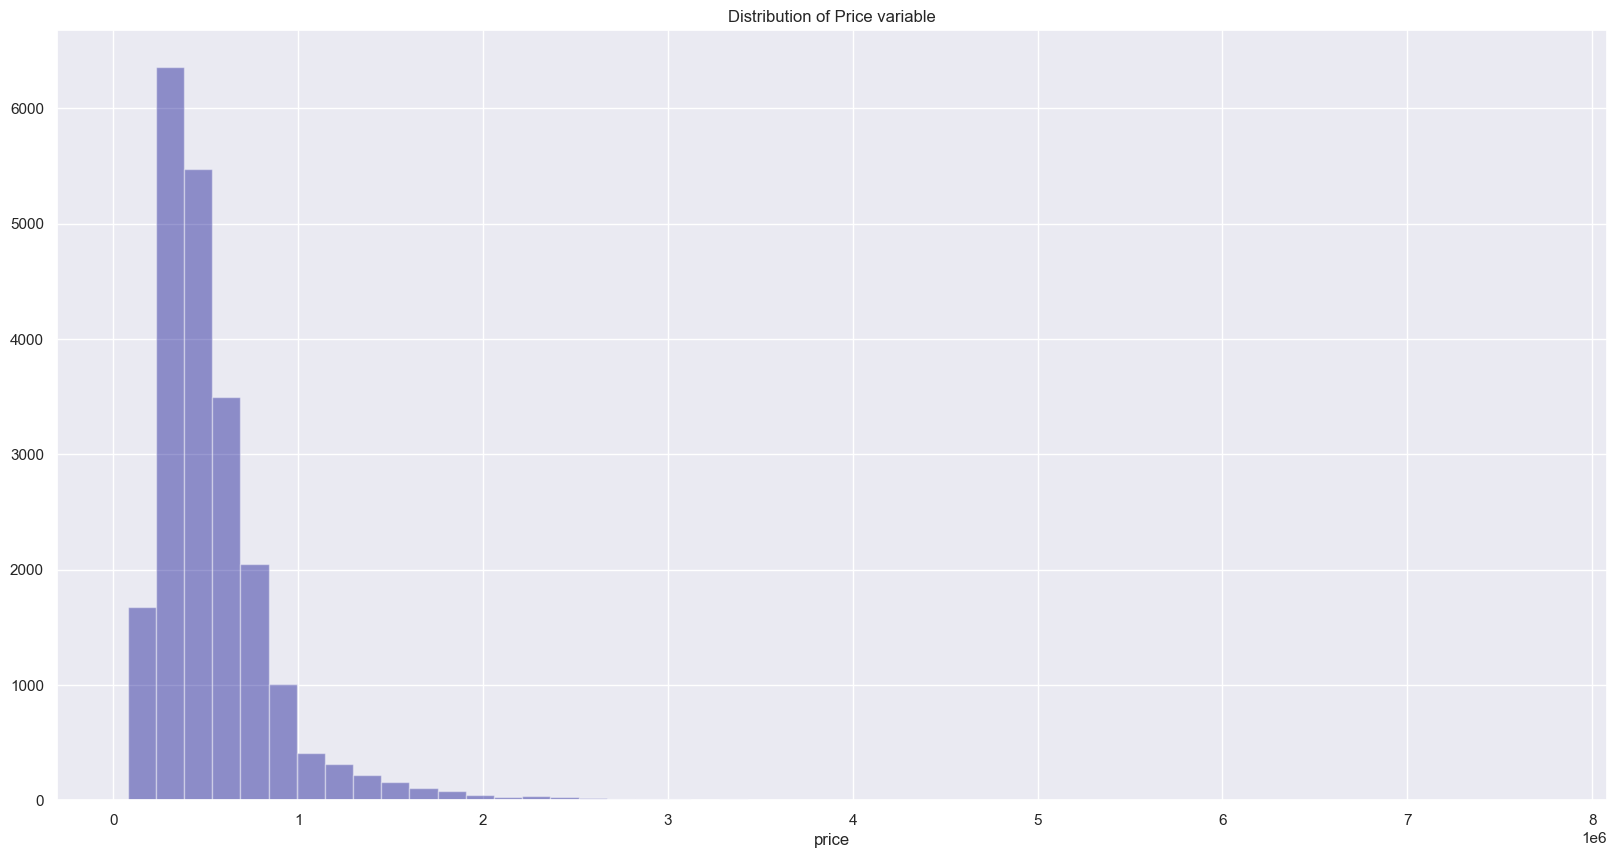

In [717]:
# Remove variables with collinearity greater than 0.8
feat =[]
for i in corr_feat:
    if i[2] >= 0.8:
        feat.append(i[0])
        feat.append(i[1])
        
df_updated.drop(list(set(feat)), axis=1, inplace=True)
df_updated.head()

#plot the (dependent) variable to see its distribution
# plt.title()
plt.figure(figsize=(20,10))
sns.distplot(df_updated.price,color='darkblue', kde=False).set_title('Distribution of Price variable')
plt.show()

### f) Outliers Identification

In [718]:
# Using Zscore method lets identify our outliers
import numpy as np

# Calculate z-scores
z_scores = (df_updated['price'] - df_updated['price'].mean()) / df_updated['price'].std()

# Define a threshold for outlier detection (e.g., z-score > 3 or < -3)
threshold = 3

# Identify outliers
outliers = df_updated[np.abs(z_scores) > threshold]

# Print the outliers
outliers

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,years_since_built,years_since_renovation
21,2000000.0,3,2.75,44867,1.0,0,4,3,9,720.0,98040,47.5316,-122.233,4110,20336,46,0.0
153,2250000.0,4,3.25,19850,2.0,0,2,3,12,1640.0,98006,47.5620,-122.162,3160,9750,9,0.0
246,2400000.0,4,2.50,8354,1.0,1,4,3,9,1820.0,98074,47.6338,-122.072,3120,18841,14,0.0
269,2900000.0,4,3.25,20100,1.5,0,1,3,11,300.0,98004,47.6312,-122.223,3890,20060,33,0.0
282,2050000.0,5,3.00,8480,2.0,0,3,5,9,1200.0,98122,47.6166,-122.287,3050,7556,110,89.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21498,1870000.0,4,3.75,8797,2.0,0,0,3,11,500.0,98039,47.6351,-122.236,2660,12150,9,0.0
21514,3000000.0,4,3.75,14823,1.0,0,0,3,11,910.0,98004,47.6200,-122.207,3030,12752,2,0.0
21524,1880000.0,5,3.50,13000,2.0,0,2,3,10,1490.0,98006,47.5382,-122.111,5790,12969,1,0.0
21552,1700000.0,4,3.50,8963,2.0,0,0,3,10,710.0,98004,47.5990,-122.197,2190,10777,1,0.0


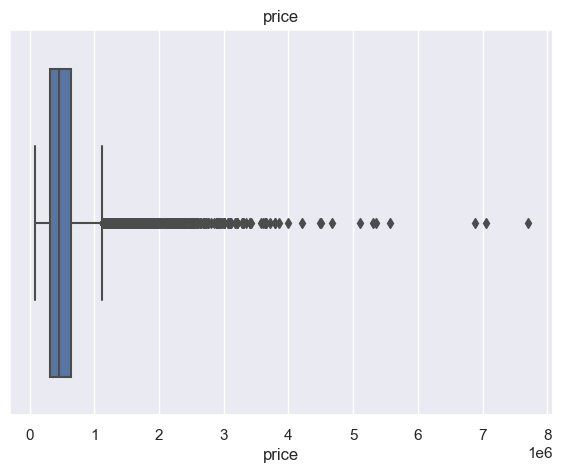

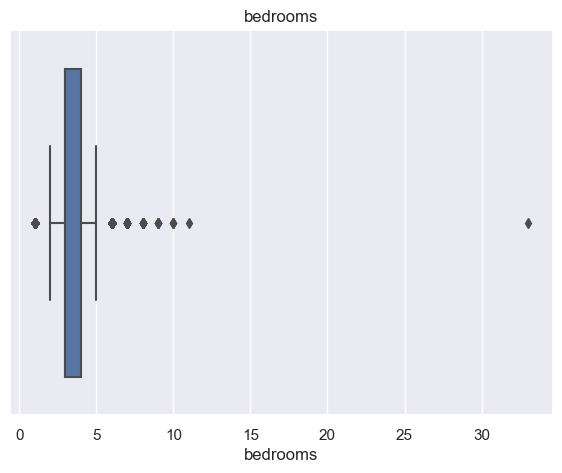

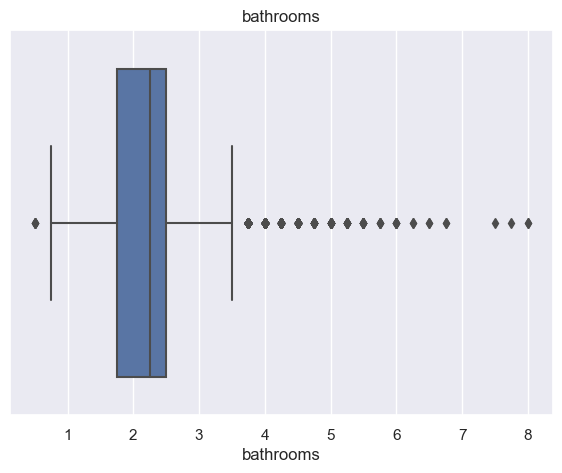

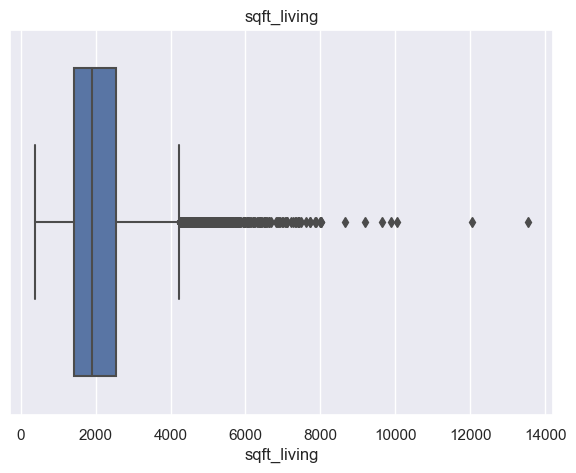

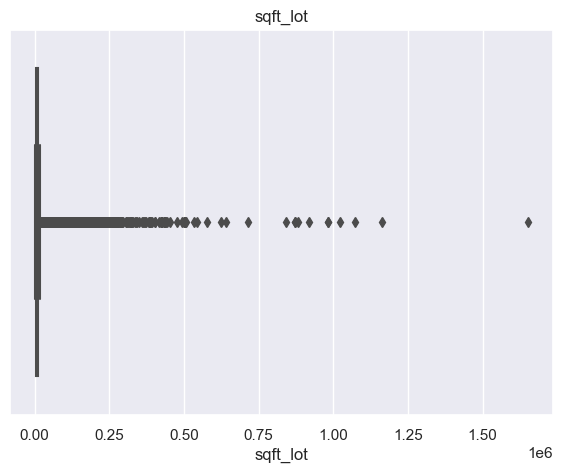

In [720]:
# use boxplots to visualize outliers in the columns by looking at their distribution
import seaborn as sns
import matplotlib.pyplot as plt

# Select the numerical columns
numerical_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']

# Create a boxplot for each numerical column
for col in numerical_cols:
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()